In [1]:
import matplotlib.pyplot as plt
import numpy as np

from vessel_models import VesselModel
from controller import TrajOpt

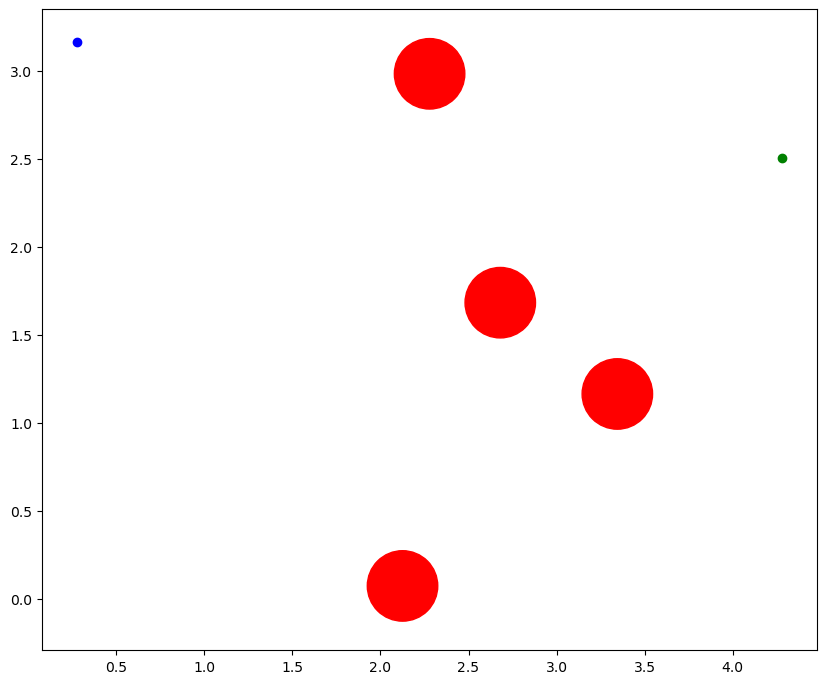


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.19, running with linear solver ma57.

Number of nonzeros in equality constraint Jacobian...:   543582
Number of nonzeros in inequality constraint Jacobian.:   891618
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:      897
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      606
Total number of inequality constrai

In [ ]:
# Simulation variables
N = 100
dt = 0.1
ns = 6
nu = 3

# Cost matrices
Qvec = 3*np.ones(ns)
Rvec = 1*np.ones(nu)
Qfvec = 10*np.ones(ns)

# Problem Definition
s0 = np.zeros(6)
s0[0] = np.random.uniform(low=0, high=1)
s0[1] = np.random.uniform(low=0, high=5)
s0[2] = np.random.uniform(low=0, high=np.pi/2)

sf = np.zeros(6)
sf[0] = np.random.uniform(low=4, high=5) # random uniform between 0-1 and 4-5
sf[1] = np.random.uniform(low=0, high=5) # random uniform between 0-5
sf[2] = np.random.uniform(low=0, high=2*np.pi) #random uniform between 0-2pi

# Obstacles - random generate number of obstacles (1-4) and center position.
# Check that no two obstacles overlap (have a center to center distance < 0.5)
# obstacles should be generated in the area between x 0-5 and y 1.5-3.5
num_obstacles = np.random.randint(4, 8+1)
obstacles = np.zeros((num_obstacles,3))

for i in range(num_obstacles):
    obstacle_candidate = [np.random.uniform(low=1.5, high=3.5),
                          np.random.uniform(low=0, high=5),
                          0.2]
    sufficient = False
    while not sufficient:
        checks = np.zeros(num_obstacles)

        for j in range(num_obstacles):
            obstacle = obstacles[j]
            if np.linalg.norm(obstacle - obstacle_candidate) < 0.6:
                checks[j] = 1
        
        if int(sum(checks)) == 0:
            sufficient = True
        else:
            obstacle_candidate = [np.random.uniform(low=1.5, high=3.5),
                                  np.random.uniform(low=0, high=5),
                                  0.2]
    obstacles[i] = obstacle_candidate

"""
fig, axes = plt.subplots(1, 1, figsize=(10, 10))

for obstacle in obstacles:
    obs_x, obs_y, obs_r = obstacle
    circle = plt.Circle((obs_x, obs_y), obs_r, color='r')
    axes.add_patch(circle)
axes.set_aspect('equal', adjustable='box')
axes.scatter(s0[0], s0[1], color='b')
axes.scatter(sf[0], sf[1], color='g')

plt.show()
"""

model = VesselModel(mismatch=False)
trajoptimizer = TrajOpt(model, N, ns, nu, dt, Qvec, Rvec, Qfvec, s0, sf, obstacles)
trajoptimizer.exec_trajopt()

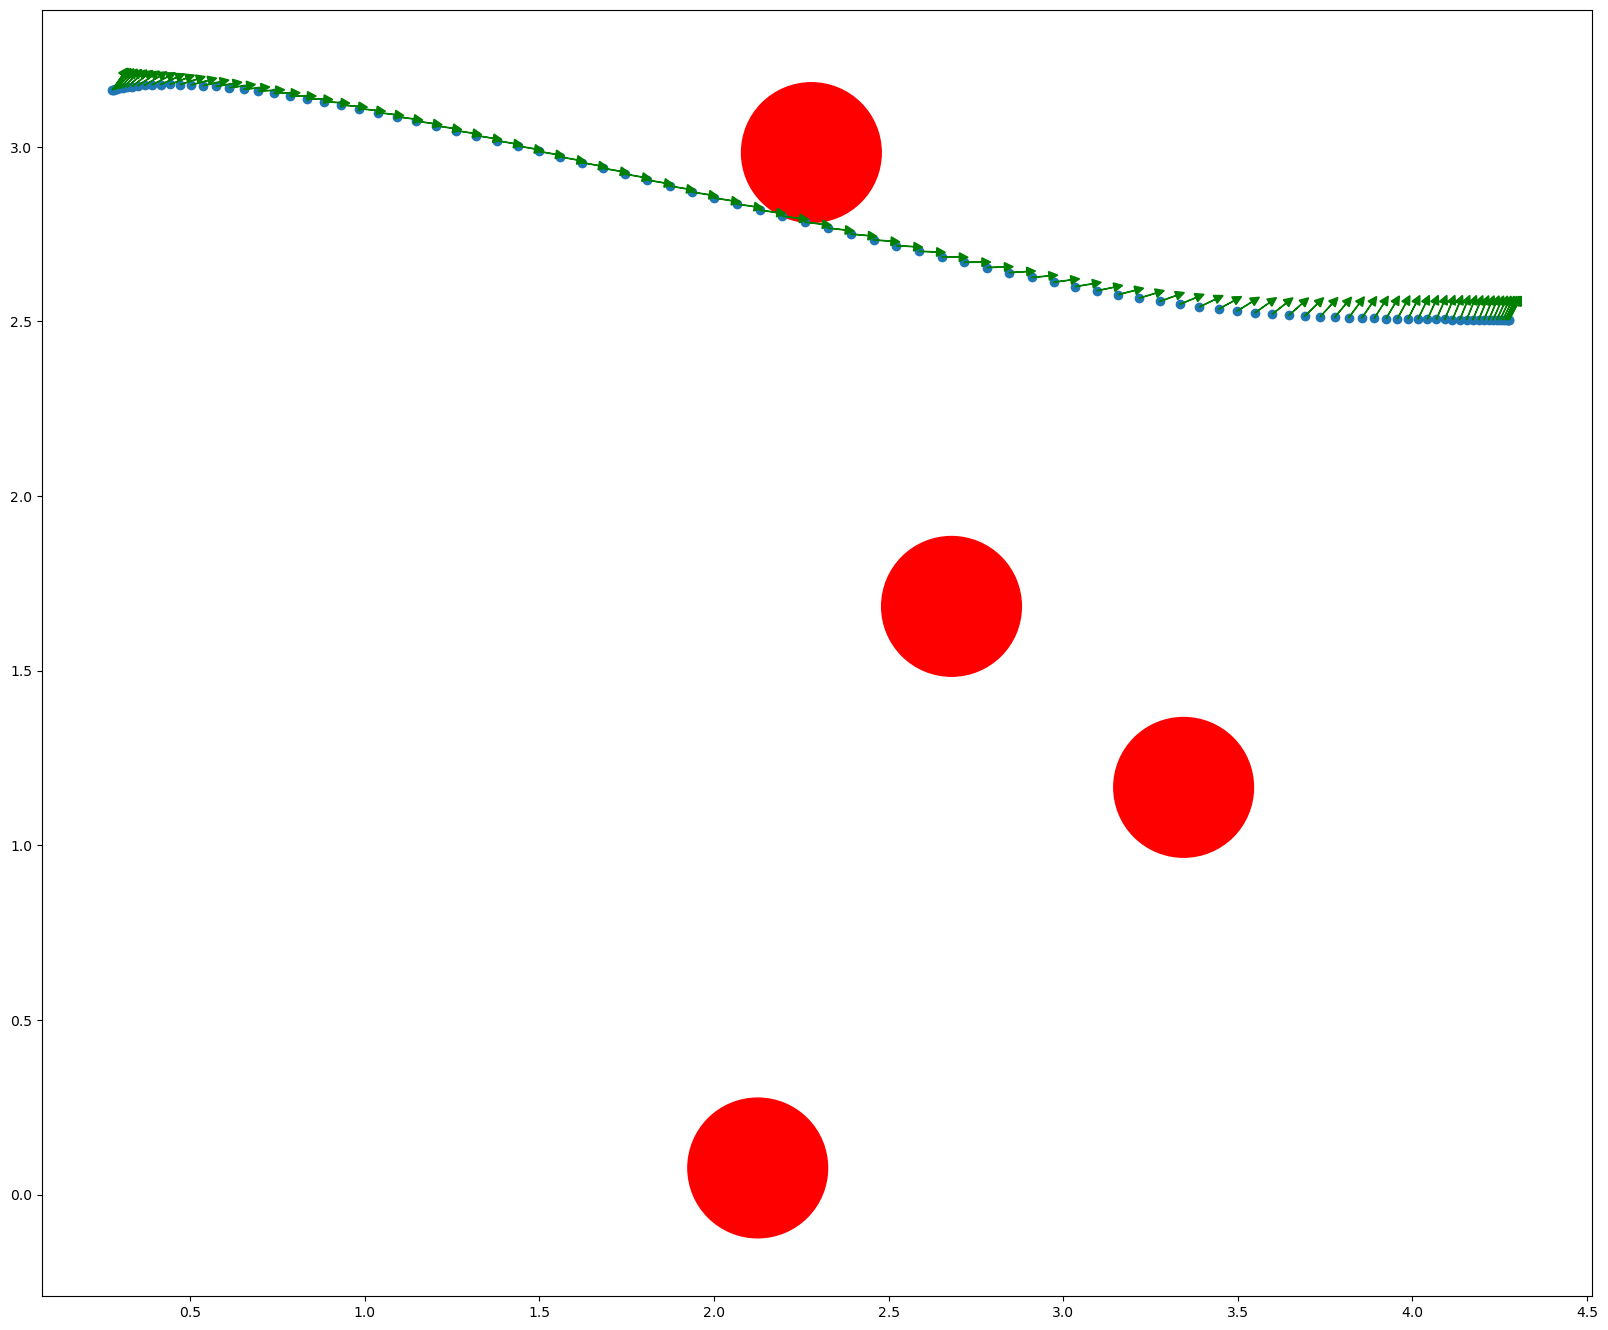

In [5]:
S, U = trajoptimizer.flat2vec(trajoptimizer.sol.x)
ps = S.T

np.savetxt("trajectories/states/dircol_soln_1.csv", S, delimiter=",")
np.savetxt("trajectories/inputs/dircol_inpu_1.csv", U, delimiter=",")
np.savetxt("trajectories/obstacles/dircol_obst_1.csv", obstacles, delimiter=",")

fig, axes = plt.subplots(1, 1, figsize=(20, 20))

for obstacle in obstacles:
    obs_x, obs_y, obs_r = obstacle
    circle = plt.Circle((obs_x, obs_y), obs_r, color='r')
    axes.add_patch(circle)

axes.scatter(ps[0], ps[1])

for i in range(len(ps[1])):
    dx = 0.05*np.cos(ps[2,i])
    dy = 0.05*np.sin(ps[2,i])
    axes.arrow(ps[0,i], ps[1, i], dx, dy, head_width=0.025, head_length=0.025, fc='green', ec='green')

axes.set_aspect('equal', adjustable='box')
plt.savefig("trajectories/figures/dircol_figu_1.png")
plt.show()

In [3]:
num_trajectories = 100
for iter_n in range(40, num_trajectories):
    # Simulation variables
    N = 100
    dt = 0.1
    ns = 6
    nu = 3

    # Cost matrices
    Qvec = 3*np.ones(ns)
    Rvec = 1*np.ones(nu)
    Qfvec = 10*np.ones(ns)

    # Problem Definition
    s0 = np.zeros(6)
    s0[0] = np.random.uniform(low=0, high=1)
    s0[1] = np.random.uniform(low=0, high=5)
    s0[2] = 0 #np.random.uniform(low=0, high=np.pi/2)

    sf = np.zeros(6)
    sf[0] = np.random.uniform(low=4, high=5) # random uniform between 0-1 and 4-5
    sf[1] = np.random.uniform(low=0, high=5) # random uniform between 0-5
    sf[2] = np.random.uniform(low=0, high=2*np.pi) #random uniform between 0-2pi

    # Obstacles - random generate number of obstacles (1-4) and center position.
    # Check that no two obstacles overlap (have a center to center distance < 0.5)
    # obstacles should be generated in the area between x 0-5 and y 1.5-3.5
    num_obstacles = 3 #np.random.randint(4, 6+1)
    obstacles = np.zeros((num_obstacles,3))

    for i in range(num_obstacles):
        obstacle_candidate = [np.random.uniform(low=1.5, high=3.5),
                            np.random.uniform(low=0, high=5),
                            0.2]
        sufficient = False
        while not sufficient:
            checks = np.zeros(num_obstacles)

            for j in range(num_obstacles):
                obstacle = obstacles[j]
                if np.linalg.norm(obstacle - obstacle_candidate) < 0.8:
                    checks[j] = 1
            
            if int(sum(checks)) == 0:
                sufficient = True
            else:
                obstacle_candidate = [np.random.uniform(low=1.5, high=3.5),
                                    np.random.uniform(low=0, high=5),
                                    0.2]
        obstacles[i] = obstacle_candidate

    """
    fig, axes = plt.subplots(1, 1, figsize=(10, 10))

    for obstacle in obstacles:
        obs_x, obs_y, obs_r = obstacle
        circle = plt.Circle((obs_x, obs_y), obs_r, color='r')
        axes.add_patch(circle)
    axes.set_aspect('equal', adjustable='box')
    axes.scatter(s0[0], s0[1], color='b')
    axes.scatter(sf[0], sf[1], color='g')

    plt.show()
    """

    model = VesselModel(mismatch=False)
    trajoptimizer = TrajOpt(model, N, ns, nu, dt, Qvec, Rvec, Qfvec, s0, sf, obstacles)
    trajoptimizer.exec_trajopt()

    # --- Saving and Plotting --- #

    S, U = trajoptimizer.flat2vec(trajoptimizer.sol.x)
    ps = S.T

    np.savetxt(f"trajectories/states/dircol_soln_{iter_n}.csv", S, delimiter=",")
    np.savetxt(f"trajectories/inputs/dircol_inpu_{iter_n}.csv", U, delimiter=",")
    np.savetxt(f"trajectories/obstacles/dircol_obst_{iter_n}.csv", obstacles, delimiter=",")

    fig, axes = plt.subplots(1, 1, figsize=(20, 20))

    for obstacle in obstacles:
        obs_x, obs_y, obs_r = obstacle
        circle = plt.Circle((obs_x, obs_y), obs_r, color='r')
        axes.add_patch(circle)

    axes.scatter(ps[0], ps[1])

    for i in range(len(ps[1])):
        dx = 0.05*np.cos(ps[2,i])
        dy = 0.05*np.sin(ps[2,i])
        axes.arrow(ps[0,i], ps[1, i], dx, dy, head_width=0.025, head_length=0.025, fc='green', ec='green')

    axes.set_aspect('equal', adjustable='box')
    plt.savefig(f"trajectories/figures/dircol_figu_{iter_n}.png")
    plt.close()

    #plt.show()

This is Ipopt version 3.14.17, running with linear solver ma57.

Number of nonzeros in equality constraint Jacobian...:   543582
Number of nonzeros in inequality constraint Jacobian.:   801918
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:      897
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      606
Total number of inequality constraints...............:      894
        inequality constraints with only lower bounds:      894
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  5.1420911e+03 4.64e+00 2.35e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00   0
   

KeyboardInterrupt: 